In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pandas as pd
from joblib import Parallel, delayed
from tqdm import tqdm
import os

## Load Important Function

In [3]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

## Plain MD

In [22]:
plain_md_path = '../Plain_MD/analysis'

omega_loaded = Data.load(f"{plain_md_path}/autocoorel_data/res_implied_timescale_clustersize_70_withnan.pkl").array_list
pi_all_means = omega_loaded[0]
pi_all_stds = omega_loaded[1]
t2_all_means = omega_loaded[2]
t2_all_stds = omega_loaded[3]
lagtimes_ns = omega_loaded[4]

pi_all_means.shape

plain_md_lagtimes_ns = lagtimes_ns
plain_md_t2_all_means = t2_all_means
plain_md_t2_all_stds = t2_all_stds

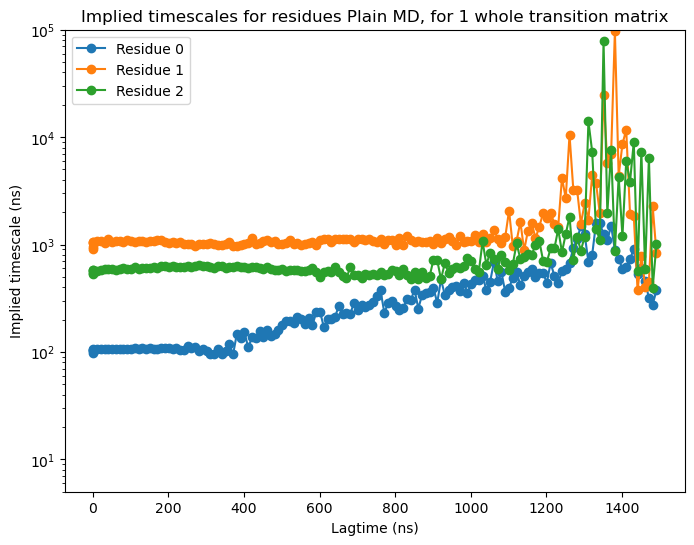

In [17]:
nres = 3
dt_in_ns = 0.01  # 10 ps per step

plt.figure(figsize=(8, 6))  # Create a single figure

for i in range(nres):
    plt.plot(plain_md_lagtimes_ns, plain_md_t2_all_means[i] * dt_in_ns, 'o-', label=f'Residue {i}')
    plt.fill_between(plain_md_lagtimes_ns, 
                     (plain_md_t2_all_means[i] + plain_md_t2_all_stds[i]) * dt_in_ns, 
                     (plain_md_t2_all_means[i] - plain_md_t2_all_stds[i]) * dt_in_ns, 
                     alpha=0.2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Implied timescale (ns)')
plt.ylim(5, 100000)
plt.yscale('log')
plt.title('Implied timescales for residues Plain MD, for 1 whole transition matrix')
plt.legend()  # Add a legend to differentiate residues



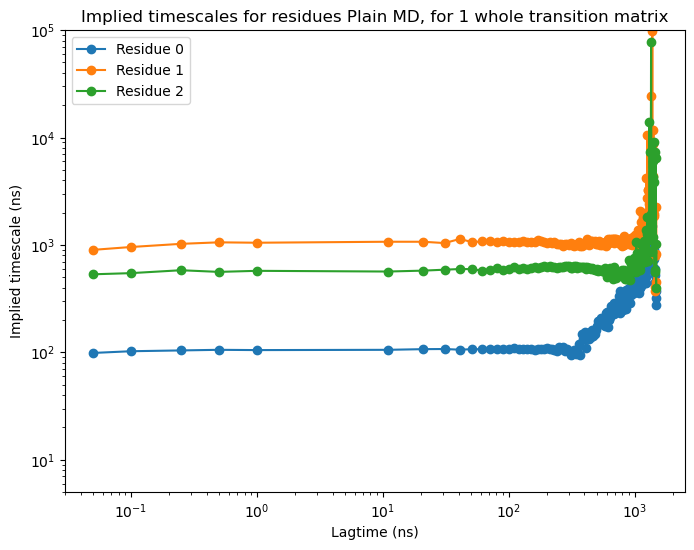

In [25]:
nres = 3
dt_in_ns = 0.01  # 10 ps per step

plt.figure(figsize=(8, 6))  # Create a single figure

for i in range(nres):
    plt.plot(plain_md_lagtimes_ns, plain_md_t2_all_means[i] * dt_in_ns, 'o-', label=f'Residue {i}')
    plt.fill_between(plain_md_lagtimes_ns, 
                     (plain_md_t2_all_means[i] + plain_md_t2_all_stds[i]) * dt_in_ns, 
                     (plain_md_t2_all_means[i] - plain_md_t2_all_stds[i]) * dt_in_ns, 
                     alpha=0.2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Implied timescale (ns)')
plt.ylim(5, 100000)
plt.yscale('log')
plt.xscale('log')
plt.title('Implied timescales for residues Plain MD, for 1 whole transition matrix')
plt.legend()  # Add a legend to differentiate residues



## EE

In [31]:
ee_path = '../EE/analysis'

omega_loaded = Data.load(f"{ee_path}/autocoorel_data/stationary_distributions_res.pkl").array_list
pi_all_means = omega_loaded[0]
pi_all_uppers = omega_loaded[1]
pi_all_lowers = omega_loaded[2]
pi_all_stds = omega_loaded[3]
t2_all_means = omega_loaded[4]
t2_all_uppers = omega_loaded[5]
t2_all_lowers = omega_loaded[6]
t2_all_stds = omega_loaded[7]
lagtimes_ns = omega_loaded[8]

ee_lagtimes_ns = lagtimes_ns
ee_t2_all_means = t2_all_means
ee_t2_all_stds = t2_all_stds

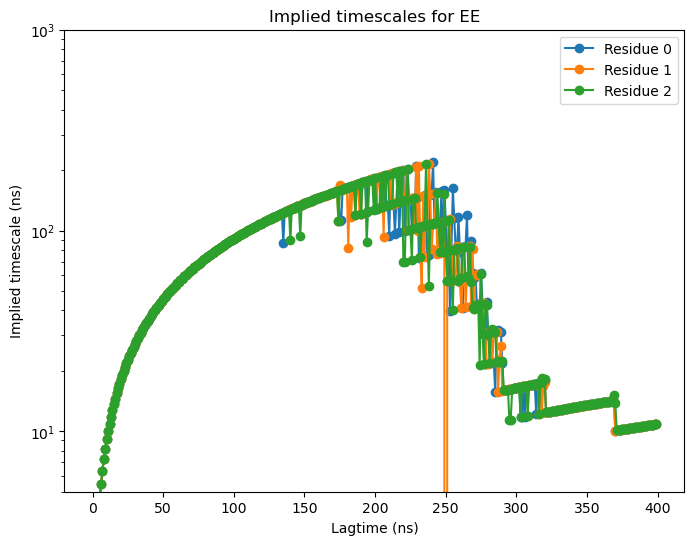

In [32]:
nres = 3
dt_in_ns = 0.01  # 10 ps per step

plt.figure(figsize=(8, 6))  # Create a single figure

for i in range(nres):
    plt.plot(ee_lagtimes_ns, ee_t2_all_means[i] * dt_in_ns, 'o-', label=f'Residue {i}')
    plt.fill_between(ee_lagtimes_ns, 
                     (ee_t2_all_means[i] + ee_t2_all_stds[i]) * dt_in_ns, 
                     (ee_t2_all_means[i] - ee_t2_all_stds[i]) * dt_in_ns, 
                     alpha=0.2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Implied timescale (ns)')
plt.ylim(5, 1000)
plt.yscale('log')
plt.title('Implied timescales for EE')
plt.legend()  # Add a legend to differentiate residues

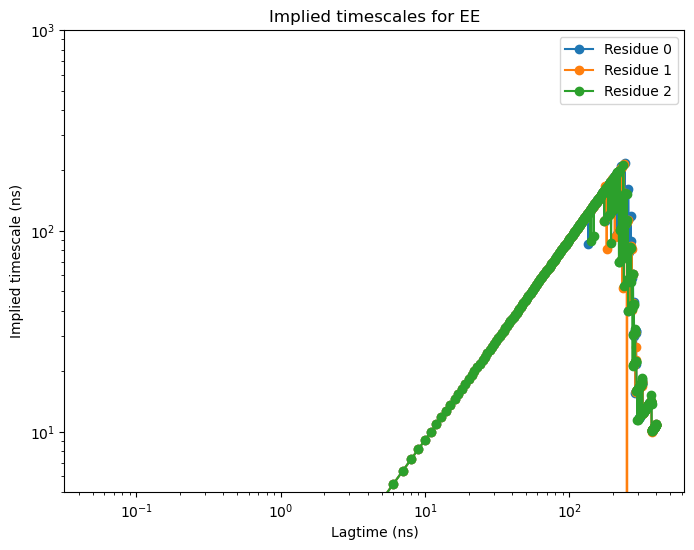

In [34]:
nres = 3
dt_in_ns = 0.01  # 10 ps per step

plt.figure(figsize=(8, 6))  # Create a single figure

for i in range(nres):
    plt.plot(ee_lagtimes_ns, ee_t2_all_means[i] * dt_in_ns, 'o-', label=f'Residue {i}')
    plt.fill_between(ee_lagtimes_ns, 
                     (ee_t2_all_means[i] + ee_t2_all_stds[i]) * dt_in_ns, 
                     (ee_t2_all_means[i] - ee_t2_all_stds[i]) * dt_in_ns, 
                     alpha=0.2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Implied timescale (ns)')
plt.ylim(5, 1000)
plt.yscale('log')
plt.xscale('log')
plt.title('Implied timescales for EE')
plt.legend()  # Add a legend to differentiate residues


## HREX

In [37]:
hrex_path = '../HREX/analysis'

omega_loaded = Data.load(f"{hrex_path}/autocoorel_data/stationary_distributions_res.pkl").array_list
pi_all_means = omega_loaded[0]
pi_all_uppers = omega_loaded[1]
pi_all_lowers = omega_loaded[2]
pi_all_stds = omega_loaded[3]
t2_all_means = omega_loaded[4]
t2_all_uppers = omega_loaded[5]
t2_all_lowers = omega_loaded[6]
t2_all_stds = omega_loaded[7]
lagtimes_ns = omega_loaded[8]

hrex_lagtimes_ns = lagtimes_ns
hrex_t2_all_means = t2_all_means
hrex_t2_all_stds = t2_all_stds
hrex_t2_all_means.shape

(3, 604)

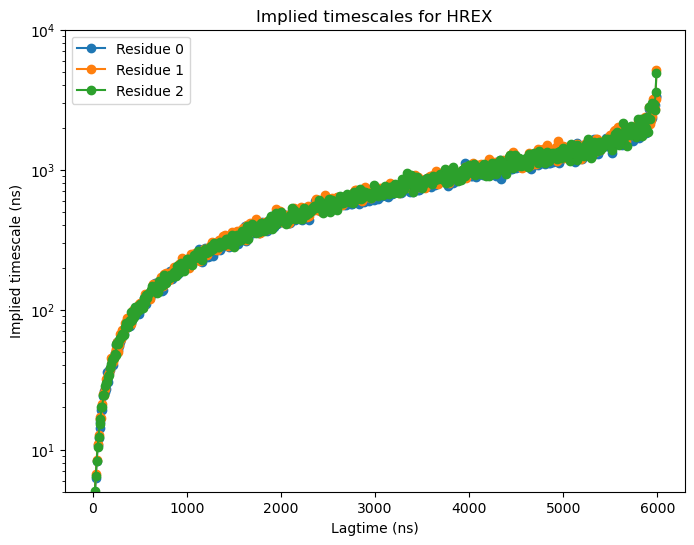

In [40]:
nres = 3
dt_in_ns = 0.01  # 10 ps per step

plt.figure(figsize=(8, 6))  # Create a single figure

for i in range(nres):
    plt.plot(hrex_lagtimes_ns, hrex_t2_all_means[i] * dt_in_ns, 'o-', label=f'Residue {i}')
    plt.fill_between(hrex_lagtimes_ns, 
                     (hrex_t2_all_means[i] + hrex_t2_all_stds[i]) * dt_in_ns, 
                     (hrex_t2_all_means[i] - hrex_t2_all_stds[i]) * dt_in_ns, 
                     alpha=0.2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Implied timescale (ns)')
plt.ylim(5, 10000)
plt.yscale('log')
plt.title('Implied timescales for HREX')
plt.legend()  # Add a legend to differentiate residues

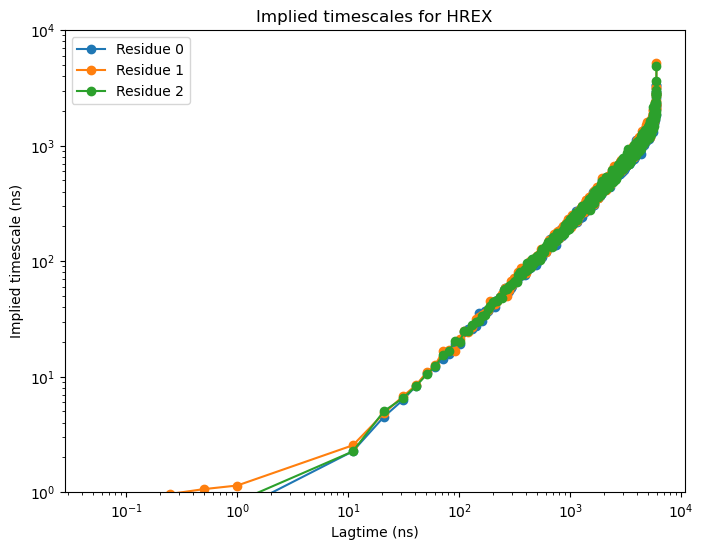

In [44]:
nres = 3
dt_in_ns = 0.01  # 10 ps per step

plt.figure(figsize=(8, 6))  # Create a single figure

for i in range(nres):
    plt.plot(hrex_lagtimes_ns, hrex_t2_all_means[i] * dt_in_ns, 'o-', label=f'Residue {i}')
    plt.fill_between(hrex_lagtimes_ns, 
                     (hrex_t2_all_means[i] + hrex_t2_all_stds[i]) * dt_in_ns, 
                     (hrex_t2_all_means[i] - hrex_t2_all_stds[i]) * dt_in_ns, 
                     alpha=0.2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Implied timescale (ns)')
plt.ylim(1, 10000)
plt.yscale('log')
plt.xscale('log')
plt.title('Implied timescales for HREX')
plt.legend()  # Add a legend to differentiate residues

## REDs

In [46]:
reds_path = '../REDs/analysis'

omega_loaded = Data.load(f"{reds_path}/autocoorel_data/stationary_distributions_res.pkl").array_list
pi_all_means = omega_loaded[0]
pi_all_uppers = omega_loaded[1]
pi_all_lowers = omega_loaded[2]
pi_all_stds = omega_loaded[3]
t2_all_means = omega_loaded[4]
t2_all_uppers = omega_loaded[5]
t2_all_lowers = omega_loaded[6]
t2_all_stds = omega_loaded[7]
lagtimes_ns = omega_loaded[8]

reds_lagtimes_ns = lagtimes_ns
reds_t2_all_means = t2_all_means
reds_t2_all_stds = t2_all_stds
reds_t2_all_means.shape

(3, 429)

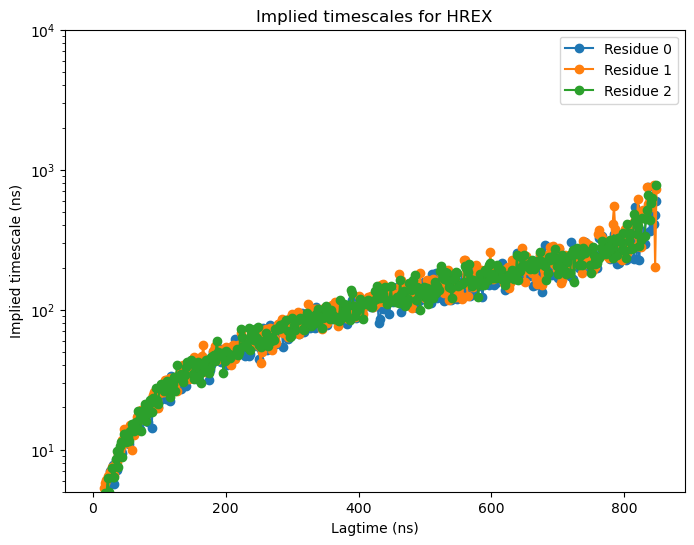

In [47]:
nres = 3
dt_in_ns = 0.004

plt.figure(figsize=(8, 6))  # Create a single figure

for i in range(nres):
    plt.plot(reds_lagtimes_ns, reds_t2_all_means[i] * dt_in_ns, 'o-', label=f'Residue {i}')
    plt.fill_between(reds_lagtimes_ns, 
                     (reds_t2_all_means[i] + reds_t2_all_stds[i]) * dt_in_ns, 
                     (reds_t2_all_means[i] - reds_t2_all_stds[i]) * dt_in_ns, 
                     alpha=0.2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Implied timescale (ns)')
plt.ylim(5, 10000)
plt.yscale('log')
plt.title('Implied timescales for HREX')
plt.legend()  # Add a legend to differentiate residues

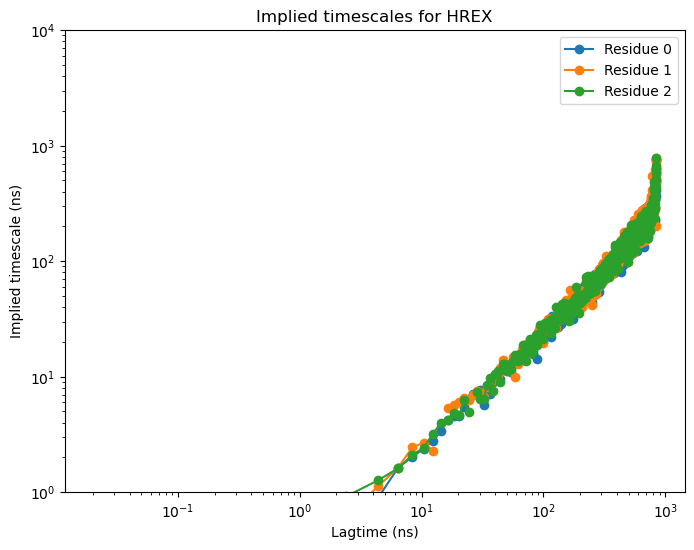

In [49]:
nres = 3
dt_in_ns = 0.004

plt.figure(figsize=(8, 6))  # Create a single figure

for i in range(nres):
    plt.plot(reds_lagtimes_ns, reds_t2_all_means[i] * dt_in_ns, 'o-', label=f'Residue {i}')
    plt.fill_between(reds_lagtimes_ns, 
                     (reds_t2_all_means[i] + reds_t2_all_stds[i]) * dt_in_ns, 
                     (reds_t2_all_means[i] - reds_t2_all_stds[i]) * dt_in_ns, 
                     alpha=0.2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Implied timescale (ns)')
plt.ylim(1, 10000)
plt.yscale('log')
plt.xscale('log')
plt.title('Implied timescales for HREX')
plt.legend()  # Add a legend to differentiate residues

## Combined Plot

In [50]:
from matplotlib.cm import get_cmap

# Colormap dictionaries for each residue
colormaps = {
    0: get_cmap('spring'),
    1: get_cmap('winter'),
    2: get_cmap('cool')
}

# Pack all simulation data
simulation_data = {
    'PlainMD': {
        'lagtimes': plain_md_lagtimes_ns,
        'mean': plain_md_t2_all_means,
        'std': plain_md_t2_all_stds,
        'dt': 0.010,
        'ylim': 100000
    },
    'EE': {
        'lagtimes': ee_lagtimes_ns,
        'mean': ee_t2_all_means,
        'std': ee_t2_all_stds,
        'dt': 0.010,
        'ylim': 1000
    },
    'HREX': {
        'lagtimes': hrex_lagtimes_ns,
        'mean': hrex_t2_all_means,
        'std': hrex_t2_all_stds,
        'dt': 0.010,
        'ylim': 10000
    },
    'REDS': {
        'lagtimes': reds_lagtimes_ns,
        'mean': reds_t2_all_means,
        'std': reds_t2_all_stds,
        'dt': 0.004,
        'ylim': 10000
    }
}


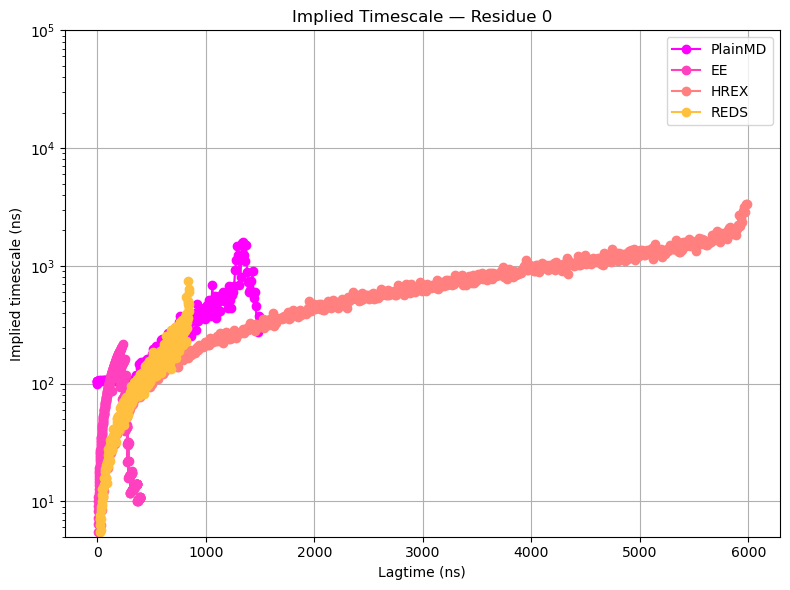

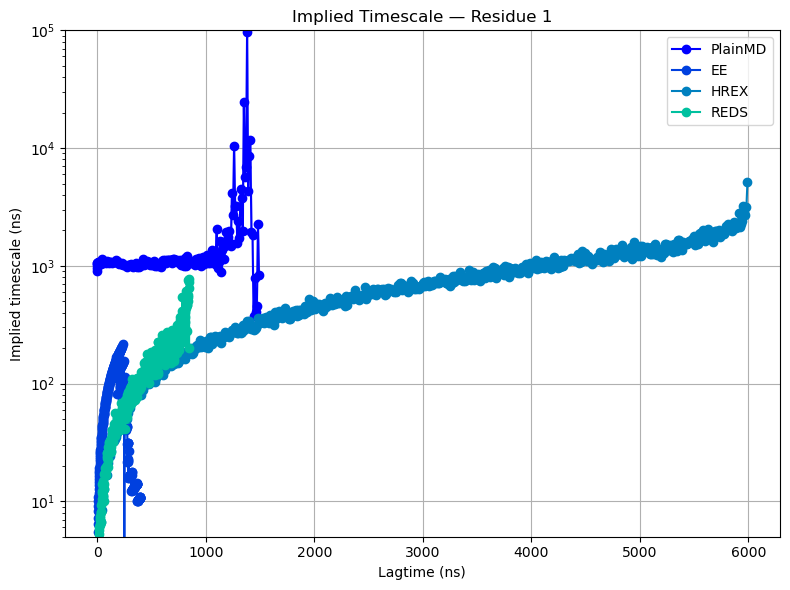

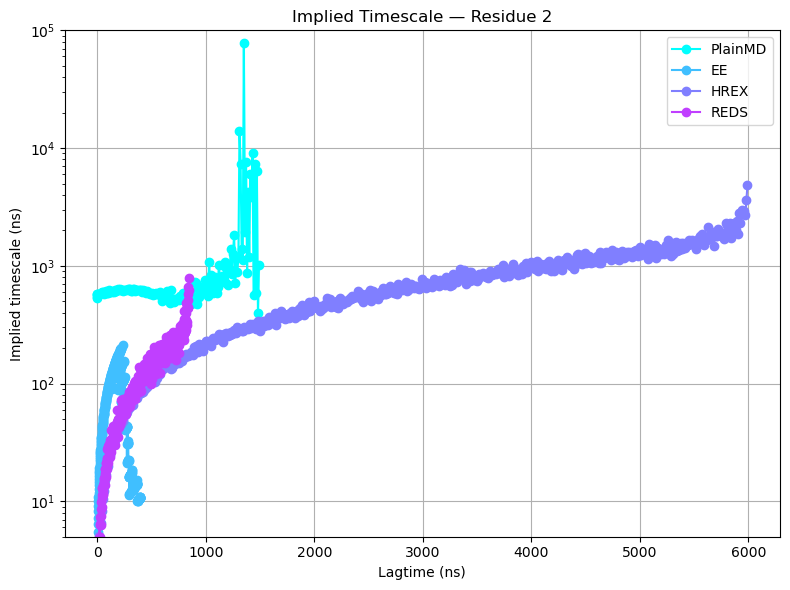

In [55]:
# Individual plots per residue
nres = 3

for i in range(nres):
    plt.figure(figsize=(8, 6))
    cmap = colormaps[i]

    for j, (sim_name, sim) in enumerate(simulation_data.items()):
        lagtimes = sim['lagtimes']
        means = sim['mean'][i]
        stds = sim['std'][i]
        dt = sim['dt']
        color = cmap(j / len(simulation_data))

        plt.plot(lagtimes, means * dt, 'o-', label=sim_name, color=color)
        plt.fill_between(lagtimes,
                         (means + stds) * dt,
                         (means - stds) * dt,
                         color=color, alpha=0.2)

    plt.title(f'Implied Timescale — Residue {i}')
    plt.xlabel('Lagtime (ns)')
    plt.ylabel('Implied timescale (ns)')
    plt.yscale('log')
    plt.ylim(5, 1e5)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    

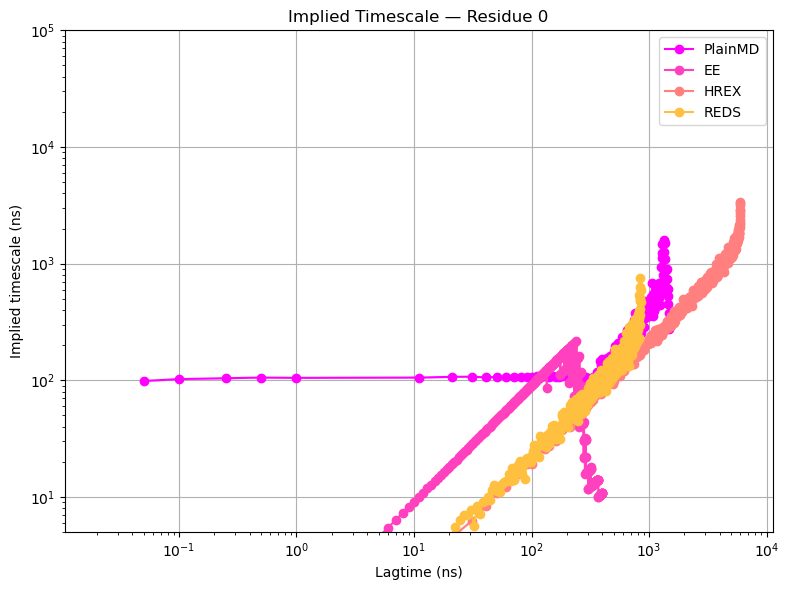

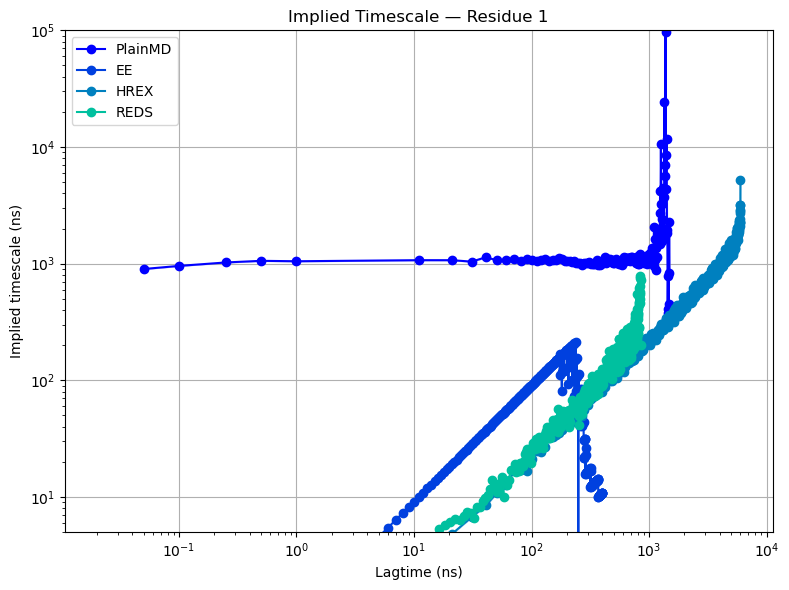

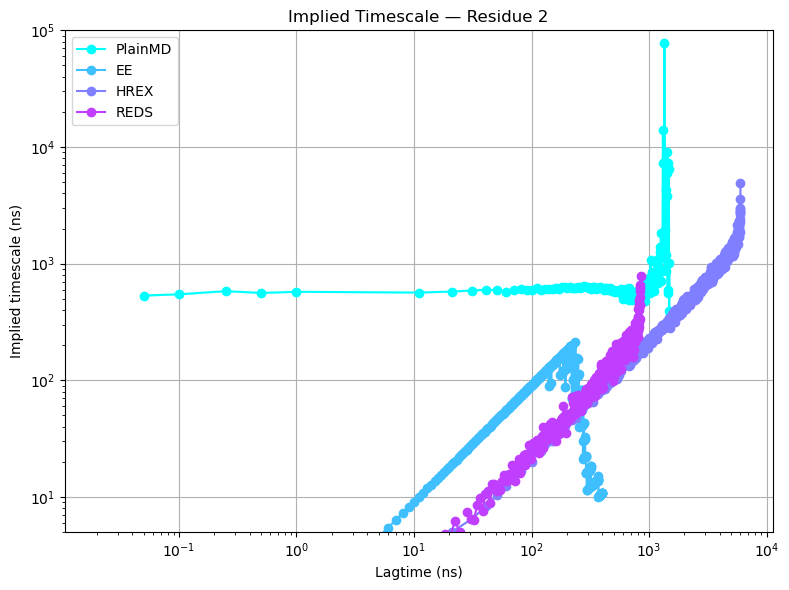

In [56]:
# Individual plots per residue
nres = 3

for i in range(nres):
    plt.figure(figsize=(8, 6))
    cmap = colormaps[i]

    for j, (sim_name, sim) in enumerate(simulation_data.items()):
        lagtimes = sim['lagtimes']
        means = sim['mean'][i]
        stds = sim['std'][i]
        dt = sim['dt']
        color = cmap(j / len(simulation_data))

        plt.plot(lagtimes, means * dt, 'o-', label=sim_name, color=color)
        plt.fill_between(lagtimes,
                         (means + stds) * dt,
                         (means - stds) * dt,
                         color=color, alpha=0.2)

    plt.title(f'Implied Timescale — Residue {i}')
    plt.xlabel('Lagtime (ns)')
    plt.ylabel('Implied timescale (ns)')
    plt.yscale('log')
    plt.xscale('log')
    plt.ylim(5, 1e5)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    

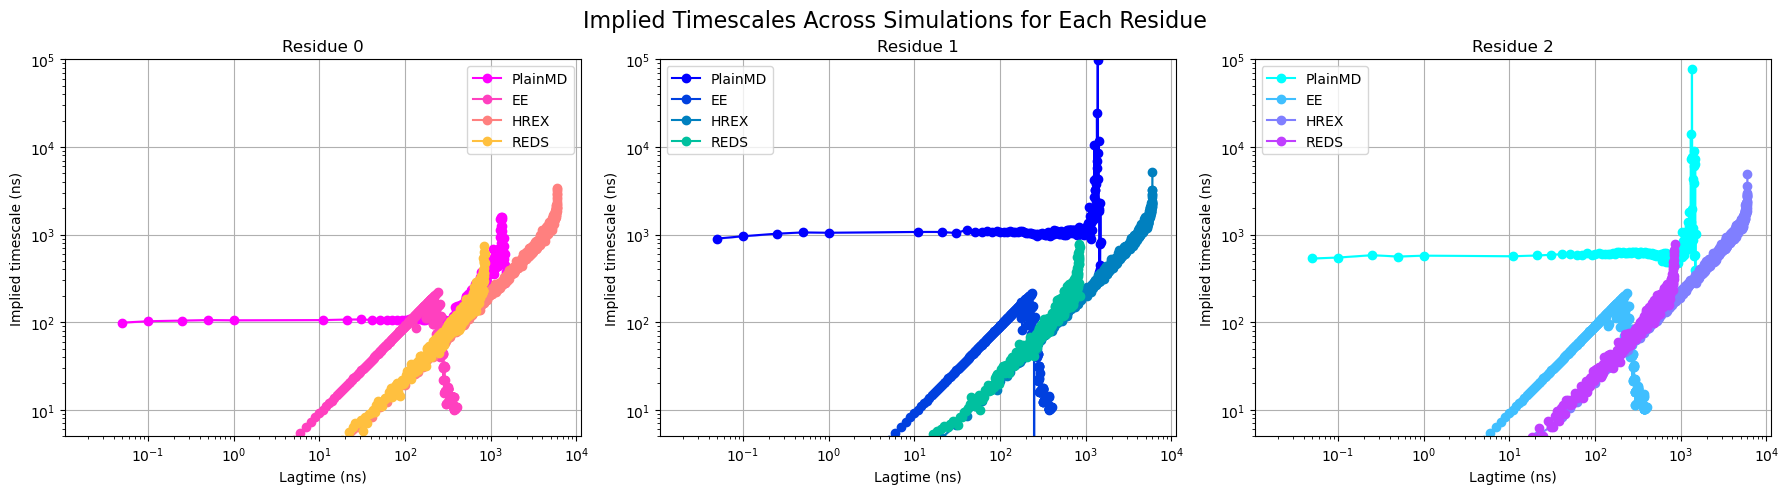

In [57]:
fig, axes = plt.subplots(1, nres, figsize=(18, 5))

for i in range(nres):
    ax = axes[i]
    cmap = colormaps[i]

    for j, (sim_name, sim) in enumerate(simulation_data.items()):
        lagtimes = sim['lagtimes']
        means = sim['mean'][i]
        stds = sim['std'][i]
        dt = sim['dt']
        color = cmap(j / len(simulation_data))

        ax.plot(lagtimes, means * dt, 'o-', label=sim_name, color=color)
        ax.fill_between(lagtimes,
                        (means + stds) * dt,
                        (means - stds) * dt,
                        color=color, alpha=0.2)

    ax.set_title(f'Residue {i}')
    ax.set_xlabel('Lagtime (ns)')
    ax.set_ylabel('Implied timescale (ns)')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(5, 1e5)
    ax.legend()
    ax.grid(True)

plt.suptitle('Implied Timescales Across Simulations for Each Residue', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
#plt.savefig("autocoorel_data/implied_timescale_combined_all_residues.png")
plt.show()
